In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import seaborn as sns
import plotly.graph_objects as go

In [2]:
traffic_data = pd.read_csv('hw03-data/Traffic Data/Lekagul Sensor Data.csv')
traffic_data['Timestamp'] = pd.to_datetime(traffic_data['Timestamp'])
# traffic_data

In [3]:
traffic_data['Date'] = traffic_data['Timestamp'].dt.date
traffic_day_type_grouped = traffic_data.groupby(['Date', 'gate-name', 'car-type']).size().reset_index(name='count')
# traffic_day_type_grouped


## Overview of Car Trend Based on Time

In [4]:
# Stack Data based on date
stacked_data = traffic_day_type_grouped.pivot_table(index='Date', columns='car-type', values='count', aggfunc='sum', fill_value=0)

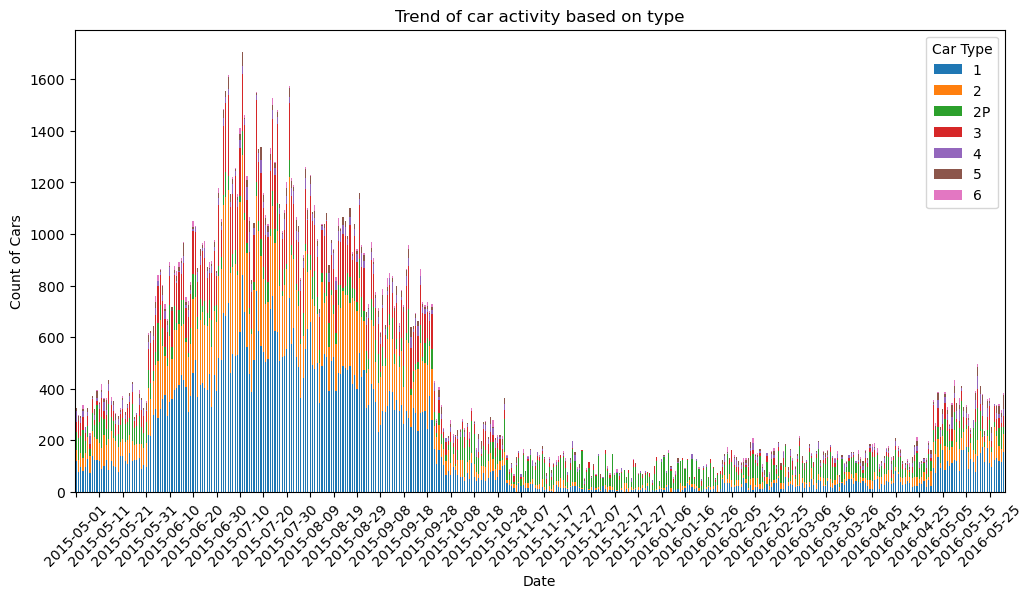

In [5]:
ax = stacked_data.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Trend of car activity based on type')
plt.xlabel('Date')
ax.set_xticks(ax.get_xticks()[::10])
plt.ylabel('Count of Cars')
plt.legend(title='Car Type')
plt.xticks(rotation=45)
plt.show()


In [6]:
all_gates = traffic_data['gate-name'].unique()
all_gates = np.sort(all_gates, axis=0)
# all_gates

In [7]:
# Stack Data based on date & gate-name
stacked_data_gate = traffic_day_type_grouped.pivot_table(index='Date', columns='gate-name', values='count', aggfunc='sum', fill_value=0)
# stacked_data_gate

In [8]:
# Combine gates based on types 

stacked_data_gate['ranger-stop'] = stacked_data_gate[['ranger-stop0', 'ranger-stop1',
       'ranger-stop2', 'ranger-stop3', 'ranger-stop4', 'ranger-stop5',
       'ranger-stop6', 'ranger-stop7']].sum(axis=1)
stacked_data_gate['entrance'] = stacked_data_gate[['entrance0',
       'entrance1', 'entrance2', 'entrance3', 'entrance4']].sum(axis=1)
stacked_data_gate['general-gate'] = stacked_data_gate[['general-gate0', 'general-gate1', 'general-gate2',
       'general-gate3', 'general-gate4', 'general-gate5', 'general-gate6',
       'general-gate7']].sum(axis=1)
stacked_data_gate['gate'] = stacked_data_gate[['gate0',
       'gate1', 'gate2', 'gate3', 'gate4', 'gate5', 'gate6', 'gate7',
       'gate8']].sum(axis=1)
stacked_data_gate['camping'] = stacked_data_gate[['camping0', 'camping1', 'camping2', 'camping3', 'camping4',
       'camping5', 'camping6', 'camping7', 'camping8']].sum(axis=1)
# stacked_data_gate

In [9]:
stacked_data_gate_type = stacked_data_gate[['camping', 'gate','ranger-stop','entrance','ranger-base','general-gate']]
# stacked_data_gate_type

In [10]:
color_map_all = {
    'camping': 'orange',
    'entrance': 'green',
    'gate': 'red',
    'general-gate': 'turquoise',
    'ranger-base': 'purple',
    'ranger-stop': 'yellow'
}

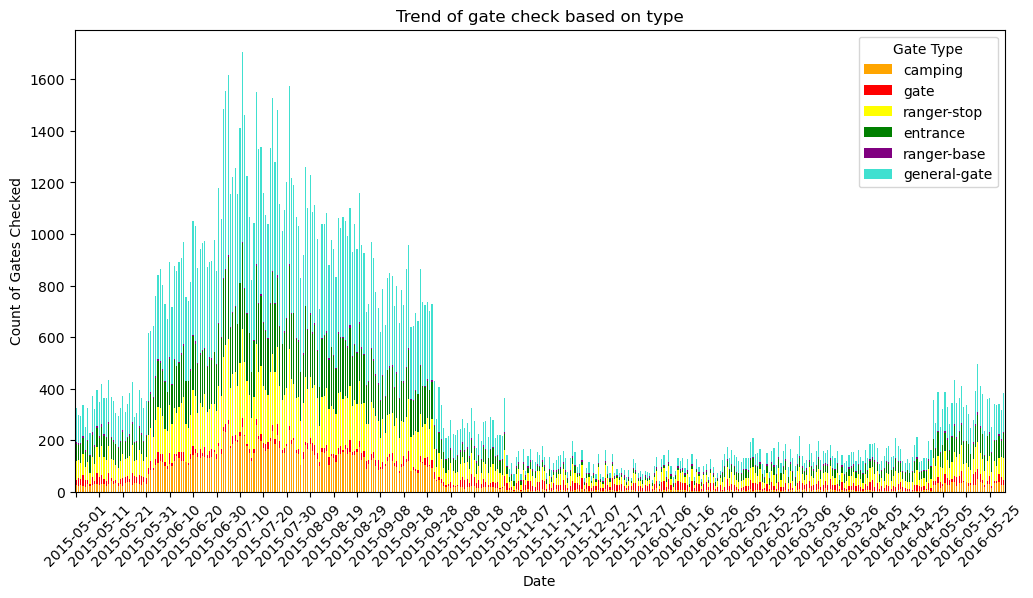

In [11]:
ax = stacked_data_gate_type.plot(kind='bar', stacked=True, figsize=(12, 6), color=color_map_all)

plt.title('Trend of gate check based on type')
plt.xlabel('Date')
plt.ylabel('Count of Gates Checked')

ax.set_xticks(ax.get_xticks()[::10])
plt.xticks(rotation=45)

plt.legend(title='Gate Type')
plt.show()

In [12]:
restricted_gates = ['gate0','gate2','gate3','gate4','gate5','gate6','gate7','gate8','ranger-base','ranger-stop0','ranger-stop1','ranger-stop2','ranger-stop3','ranger-stop3','ranger-stop4','ranger-stop5','ranger-stop6','ranger-stop7']

In [13]:
# for i in ['1','2','2P','3','4','5','6']:
#     car_type_i_data = traffic_data[traffic_data['car-type'] == i]  # Filter for current car type
#     print('Car Type '+ i + ' has been through gates:')

#     print(set(restricted_gates).intersection(car_type_i_data['gate-name'].unique()))

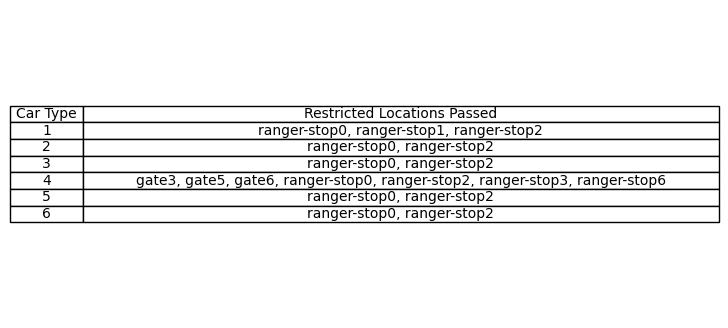

In [14]:
# create a table that outputs all the unique gates where normal cars should not enter
#  
# Write the data in a dictionary
data = {
    'Car Type': ['1', '2', '3', '4', '5', '6'],
    'Restricted Locations Passed': [
        {'ranger-stop2', 'ranger-stop0', 'ranger-stop1'},
        {'ranger-stop2', 'ranger-stop0'},
        {'ranger-stop2', 'ranger-stop0'},
        {'gate5', 'ranger-stop6', 'gate3', 'gate6', 'ranger-stop0', 'ranger-stop2', 'ranger-stop3'},
        {'ranger-stop2', 'ranger-stop0'},
        {'ranger-stop2', 'ranger-stop0'}
    ]
}

# Convert the set to a string to make it table-friendly
data['Restricted Locations Passed'] = [', '.join(sorted(gates)) for gates in data['Restricted Locations Passed']]

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Plot the table
fig, ax = plt.subplots(figsize=(8, 4))  # Adjust size as needed

# Hide axes
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Create the table
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

# Set the font size for the table
table.auto_set_font_size(False)
table.set_fontsize(10)

# Adjust the column width
table.auto_set_column_width(col=list(range(len(df.columns))))

# Save the table as an image
plt.savefig("car_type_gates_table.png", bbox_inches='tight')

# Show the plot
plt.show()

In [15]:
from PIL import Image

# Load the image
map = Image.open('hw03-data/Traffic Data/Lekagul Roadways.bmp')

# Convert to numpy array
map_data = np.array(map)
# print(map_data)

In [16]:
# Define the coordinates for each gate/location
gates_coordinates = {
    'camping0': (52, 41), 'camping1': (129, 50), 'camping2': (44, 64), 'camping3': (45, 68),
    'camping4': (48, 89), 'camping5': (20, 121), 'camping6': (150, 177), 'camping7': (181, 145),
    'camping8': (183, 48), 'entrance0': (62, 13), 'entrance1': (17, 67), 'entrance2': (183, 87),
    'entrance3': (115, 167), 'entrance4': (140, 184), 'gate0': (63, 33), 'gate1': (58, 44),
    'gate2': (24, 54), 'gate3': (149, 60), 'gate4': (164, 114), 'gate5': (131, 146),
    'gate6': (116, 151), 'gate7': (97, 161), 'gate8': (138, 181), 'general-gate0': (110, 9),
    'general-gate1': (64, 25), 'general-gate2': (104, 32), 'general-gate3': (186, 55),
    'general-gate4': (69, 98), 'general-gate5': (124, 111), 'general-gate6': (136, 137),
    'general-gate7': (65, 144), 'ranger-base': (128, 175), 'ranger-stop0': (89, 16),
    'ranger-stop1': (19, 24), 'ranger-stop2': (80, 35), 'ranger-stop3': (148, 45),
    'ranger-stop4': (18, 95), 'ranger-stop5': (151, 118), 'ranger-stop6': (123, 147),
    'ranger-stop7': (100, 152)
}

Example visualization showing one car's path -- not used eventually

In [17]:
# Convert gates_coordinates into a DataFrame
gates_df = pd.DataFrame.from_dict(gates_coordinates, orient='index', columns=['x', 'y'])
gates_df.index.name = 'gate-name'
gates_df.reset_index(inplace=True)

# Merge traffic_data with gates_df to include coordinates
traffic_data = traffic_data.merge(gates_df, on='gate-name', how='left')
# traffic_data

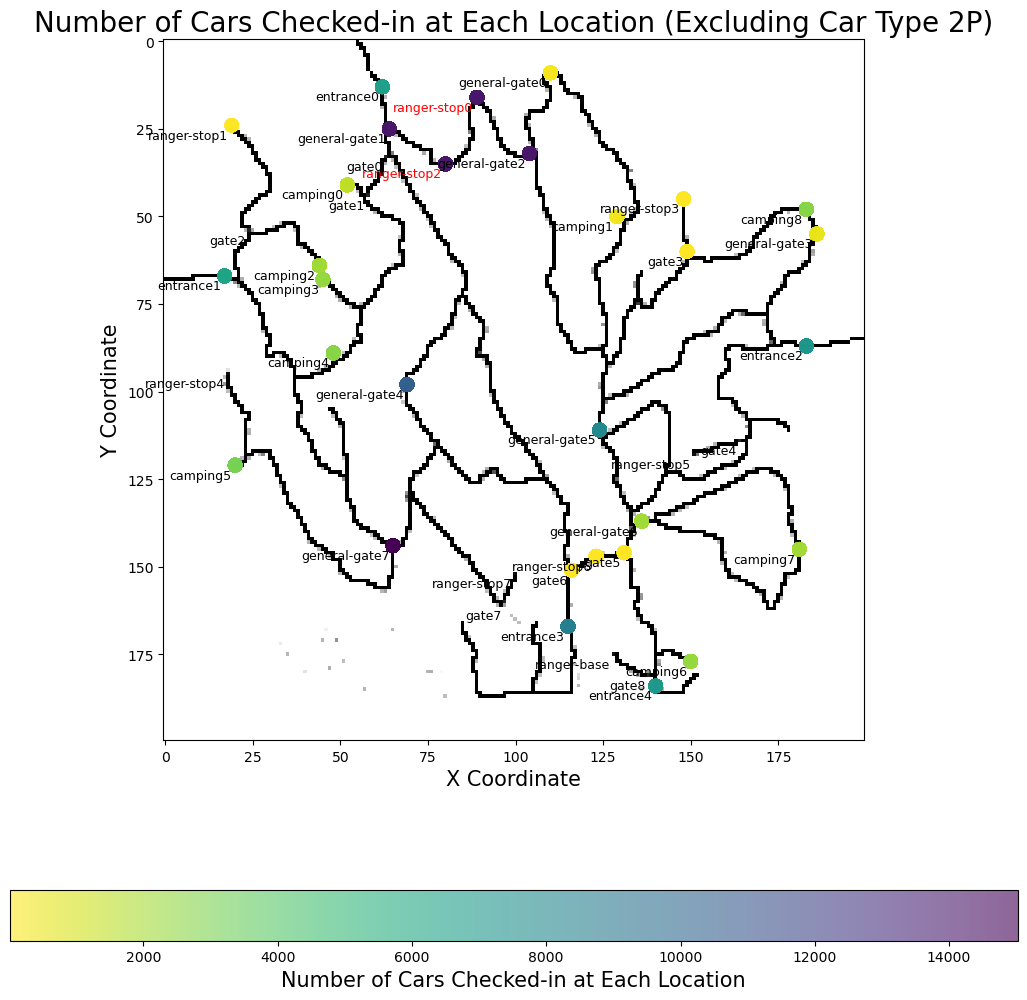

In [18]:
# IMPORTANT: This is the figure that incorporate all car types but does not include 2P cars

# Filter traffic_data to exclude "car-type" == "2P" only for this plot
filtered_traffic_data = traffic_data[traffic_data['car-type'] != '2P']

# Group by 'gate-name' and count occurrences
gate_counts = filtered_traffic_data.groupby('gate-name').size().reset_index(name='count')

# Display the count DataFrame
# print(gate_counts)

# Merge counts back into the original DataFrame (if needed)
filtered_traffic_data_count = filtered_traffic_data.merge(gate_counts, on='gate-name', how='left')
# filtered_traffic_data_count



# Set up the figure
plt.figure(figsize=(13, 13))

reverted_map = 200 - map_data
plt.imshow(reverted_map, cmap='gray')  # Using a grayscale colormap

# Plot each location
for name, (x, y) in gates_coordinates.items():
    # make the gates that are heavily used inproperly stand out on the plot
    if name in ["ranger-stop0", "ranger-stop2"]:
        text_color = 'red'
    else:
        text_color = 'black'

    # plt.scatter(x, y, label=name)
    plt.text(x-1, y+1, name, fontsize=9, ha = 'right', ma = 'left', va = 'top', color = text_color)
    # plt.text(x + 2, y, name, fontsize=10, ha = 'left')
    


# Create a scatter plot
scatter = plt.scatter(
    filtered_traffic_data['x'], 
    filtered_traffic_data['y'], 
    c=filtered_traffic_data_count['count'],  # Use counts for color
    cmap='viridis_r', 
    alpha=0.6,
    s = 90,
    # edgecolor='k'  # Add edge color to points for better visibility
)

# Add horizontal color bar for legend
cb = plt.colorbar(scatter, orientation='horizontal')
cb.set_label('Number of Cars Checked-in at Each Location', fontsize = '15')

# Set titles and labels
plt.title('Number of Cars Checked-in at Each Location (Excluding Car Type 2P)', fontsize = '20')
plt.xlabel('X Coordinate', fontsize = '15')
plt.ylabel('Y Coordinate', fontsize = '15')


# Show the plot
plt.show()
